TP6 -Algorithmes pour la résolution de problèmes de moindres carrés
====================================

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
import math
import scipy.io

1. Problèmes de moindres carrés linéaires
------------------------------------------

Soient $(x_i,y_i)$, $i=1,\dots,n$ un nuage donné de points. On cherche la relation existant entre les valeurs $x_i$ et les valeurs $y_i$. Pour illustrer cet exercice on introduit deux jeux de données:
* Jeu A. On possède $6$ spécimens fossiles d'un animal disparu et ces spécimens sont de tailles différentes. On estime que si ces animaux appartiennent à la même espèce, il doit exister une relation linéaire entre la longueur de deux de leurs os: le fémur et l'humérus. Voici les données de ces longueurs en cm pour les $5$ spécimens possédant ces deux os intacts:

In [2]:
# Longueur du fémur
xA = np.array([38,56,59,64,74])
# Longueur de l'humérus
yA = np.array([41,63,70,72,84])

* Jeu B. On cherche une relation entre les données suivantes:

In [3]:
xB = np.array([0,1,2,3,4,5,6])
yB = np.array([-5.3,0.4,2.6,4.3,3,0.5,-5.4])

### A. Régression linéaire

Supposons pour commencer qu'il existe une relation linéaire entre nos données: 
$$y=ax+b.$$
1. Montrer que le problème ci-dessus s'écrit sous la forme d'un pb d'un problème de moindres carrés linéaires:
$$(P) \qquad\displaystyle \min_{(a,b)\in\mathbb{R}} \frac{1}{2}\|A\left(\begin{array}{c}
a\\ b
\end{array}\right)-y\|_2^2.$$

2. Montrer que le problème $(P)$ admet un unique point de minimum global $(\bar a,\bar b)$ sur $\mathbb{R}^2$ et caractériser ce point (*On pourra montrer que la solution $(a,b)$ est solution d'un système linéaire que l'on explicitera*).

3. Programmer la résolution numérique de ce problème pour les jeux $A$ et $B$. Commentez.

In [4]:
def regressionlineaire(x,y):
    # Calcul de la moyenne des abscisses
    xMoy = np.mean(x)
    # Calcul de la moyenne des ordonnées
    yMoy = np.mean(y)
    # Calcul de la pente de la droite
    a = np.sum((x-xMoy)*(y-yMoy))/np.sum((x-xMoy)**2)
    # Calcul de l'ordonnée à l'origine
    b = yMoy-a*xMoy
    return a,b

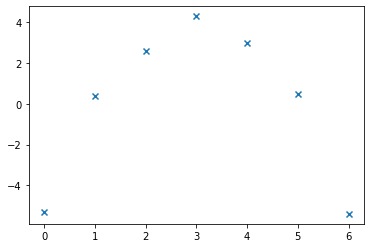

In [5]:
#Affichage des points de mesure
# x=xA
# y=yA
x=xB
y=yB
plt.scatter(x,y,marker='x')
plt.show()

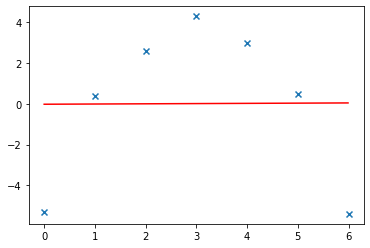

In [6]:
[a,b]=regressionlineaire(x,y)
n=len(x)
xx =np.arange(x[0],x[n-1],0.01)
plt.plot(xx,a*xx+b,'r')
plt.scatter(x,y,marker='x')
plt.show()

### B. Améliorons le modèle mathématique

Au vu des résultats précédents pour le jeu $B$, on estime que la relation entre les données $x_i$ et $y_i$, $i=1,\dots,7$ est de la forme: 
$$y=ax^2+bx+c$$ 
1. Re-formuler le problème sous la forme d'un problème de moindres carrés linéaires.
2. Montrer que la solution $(a,b,c)$ est solution d'un système linéaire que l'on explicitera.
3. Applications: programmer la résolution numérique de ce problème pour les jeux $A$ et $B$. Commentez.

In [25]:
def parabole(x, y):
    # parabole des moindres carrés
    # x : abscisses
    # y : ordonnées
    # a,b,c : coefficients de la parabole
    # y = a*x**2 + b*x + c

    # Somme des carrés à minimiser :
    # S = sum((y - a*x**2 - b*x - c)**2)

    # Dérivée de S par rapport à a :
    # dS/da = sum(-2*x**2*(y - a*x**2 - b*x - c))

    # Dérivée de S par rapport à b :
    # dS/db = sum(-2*x*(y - a*x**2 - b*x - c))

    # Dérivée de S par rapport à c :
    # dS/dc = sum(-2*(y - a*x**2 - b*x - c))

    # Les dérivées sont nulles pour les minimums locaux :
    # dS/da = 0
    # dS/db = 0
    # dS/dc = 0

    # On obtient donc :
    # sum(-2*x**2*(y - a*x**2 - b*x - c)) = 0
    # sum(-2*x*(y - a*x**2 - b*x - c)) = 0
    # sum(-2*(y - a*x**2 - b*x - c)) = 0

    # Soit :
    # sum(x**2*y) = a*sum(x**4) + b*sum(x**3) + c*sum(x**2)
    # sum(x*y) = a*sum(x**3) + b*sum(x**2) + c*sum(x)
    # sum(y) = a*sum(x**2) + b*sum(x) + c*sum(1)

    # Qui est un système linéaire à résoudre :
    # A.a = B

    n = len(x)
    Sx = np.sum(x)
    Sxx = np.sum(np.power(x, 2))
    Sxxx = np.sum(np.power(x, 3))
    Sxxxx = np.sum(np.power(x, 4))

    Sy = np.sum(y)
    Sxy = np.sum(x * y)
    Sxxy = np.sum(np.power(x, 2) * y)


    A = np.array([np.flip([n, Sx, Sxx]), np.flip([Sx, Sxx, Sxxx]), np.flip([Sxx, Sxxx, Sxxxx])])
    B = np.array([Sy, Sxy, Sxxy])
    a = npl.solve(A, B)

    print("a = ", a)

    return a


a =  [-1.04166667  6.26071429 -5.22619048]


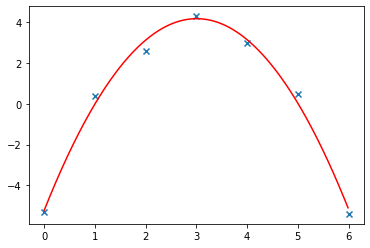

In [26]:
[a,b,c]=parabole(xB,yB)
n=len(xB)
xx =np.arange(xB[0],xB[n-1],0.01)
plt.plot(xx,a*(xx**2)+b*xx+c,'r')
plt.scatter(xB,yB,marker='x')
plt.show()

2. Problèmes de moindres carrés non linéaires
----------------------------------------------

On considère un circuit RLC série en régime permanent (c'est-à-dire quand l'équilibre s'est installé) et en oscillations forcées (c'est-à-dire qu'on impose à ses bornes une tension sinusoidale).

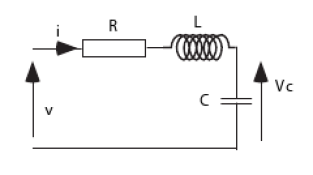

On sait alors (grâce à la physique et en résolvant une équation différentielle linéaire du second ordre à coefficients constants) que la tension aux bornes du condensateur est de la forme:
$$
U(t)=U_{max} \cos(\omega t+\phi)
$$
où $U_{max}$, $\omega$ et $\phi$ sont fonction des caractéristiques du circuit (résistance, inductance, condensateur, tension imposée). 

On mesure expérimentalement la tension aux bornes du condensateur. On note $U_n$ la tension mesurée à l'instant $t_n$ pour $n$ variant de $1$ à $N$. 

In [ ]:
#Generation des données
data=scipy.io.loadmat('data.mat')
t=data['t']
#t=tU[:,0]
U=data['U']
N=len(t)

In [ ]:
#Affichage des points de mesure
plt.scatter(t, U,marker='x')
plt.show()

A partir de ces $N$ mesures, on souhaite connaître les caractéristiques du circuit RLC, donc les grandeurs $U_{max}$, $\omega$ et $\phi$. On va donc chercher les valeurs de $U_{max}$, $\omega$ et $\phi$ tels que $U(t_n)$ soit le plus proche possible de $U_n$ pour tout $n$.

Q1. Expliquer pourquoi le problème décrit ci-dessus se traduit mathématiquement par
$$min\left\{ r(x_1,x_2,x_3)= \frac{1}{2} \sum_{n=1}^N \left( x_1 \cos(x_2 t_n+ x_3) - U_n\right)^2 \, , \, (x_1,x_2,x_3)\in \mathbb{R}^3 \right\}$$

Q2. Traduire ce problème de minimisation en un problème du type:
$$min\left\{r(x_1,x_2,x_3)= \frac{1}{2}\|g(x)\|_2^2\right\}.$$
Calculer explicitement la fonction $g$ et sa matrice jacobienne. L'implémenter.

In [ ]:
def fct_g(x,t,U):
    # TO DO
    return g,Jg

In [ ]:
g,Jg= fct_g(np.array([0,0,0]),t,U)
A=np.transpose(Jg).dot(Jg)
print(g.shape)

Q3. Ecrire l'algorithme de Gauss-Newton pour résoudre le problème posé à la question précédente.

In [ ]:
def GaussNewton(function,x0,epsilon):
    x = np.copy(x0)
    y=[x]
    eps = 1e-10
    itermax = 1000
    err = 2*eps
    iter = 0
    while err>eps and iter<itermax:  
        #TO DO
        iter += 1
    xiter=np.array(y)
    return x,xiter,iter

In [ ]:
# Tester plusieurs points initiaux
x0 = np.array([1,1,1])
#x0 = np.zeros(3)

epsilon=0.0001
x,xiter,iter=GaussNewton(fct_g,x0,epsilon)
Umax=x[0]
omega=x[1]
phi = x[2]
plt.scatter(t, U,marker='x')
tt=np.arange(0,10,0.01)
plt.plot(tt,Umax*np.cos(omega*tt+phi),color='red')
plt.show()
print "a : convergence vers ",x," nb iterations : ",iter

Expliquer pourquoi, pour $x_0=(0,0,0)$ par exemple, l'algorithme ne renvoie pas le résultat attendu. A quelle propriété de l'algorithme de Gauss-Newton, cela correspond-il ?